In [ ]:
20231024-223508

In [1]:
path_pre=r"C:\Users\furqa\Downloads\20231220-203011.log"

In [6]:
path_pre=r"C:\Users\furqa\OneDrive - University of California, Davis\Documents\GitHub\RAship\Github\Twitter\Data_Furqan\Algorithm\Impedamce test files\withoutsignalgeneratr.log"

In [ ]:
"C:\Users\furqa\OneDrive - University of California, Davis\Documents\GitHub\RAship\Github\Twitter\Data_Furqan\Algorithm\Impedamce test files\low voltage.log"

In [29]:
path_pre=r"C:\Users\furqa\OneDrive - University of California, Davis\Documents\GitHub\RAship\Github\Twitter\Data_Furqan\Algorithm\Impedamce test files\low voltage.log"

In [45]:
path_pre=r"C:\Users\furqa\OneDrive - University of California, Davis\Documents\GitHub\RAship\Github\Twitter\Data_Furqan\Algorithm\Impedamce test files\high voltage 1 v.log"

In [46]:
import re
import pandas as pd

# Define a regular expression pattern to extract the required information
pattern = r'\[(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{3})\] \[info\] Impedance of (E\d+) = (\d+kOhms)'

# Create an empty list to store data rows
data_rows = []

# Open the text file
with open(path_pre, 'r') as file:
    for line in file:
        # Use regex to search for the pattern in each line
        match = re.search(pattern, line)
        if match:
            # Extract the information from the matched line
            timestamp = match.group(1)
            channel = match.group(2)
            impedance = match.group(3)

            # Append the extracted information as a new row to the list
            data_rows.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance})

# Create a DataFrame from the list of data rows
df_pre = pd.DataFrame(data_rows)

# Display the DataFrame
print(df_pre)


                   Timestamp Channel Impedance
0    2024-01-25 00:54:13.477      E1   86kOhms
1    2024-01-25 00:54:13.578      E2   37kOhms
2    2024-01-25 00:54:13.659      E3   36kOhms
3    2024-01-25 00:54:13.740      E4   24kOhms
4    2024-01-25 00:54:13.900      E5   73kOhms
..                       ...     ...       ...
376  2024-01-25 00:54:55.866    E123   49kOhms
377  2024-01-25 00:54:55.946    E124   39kOhms
378  2024-01-25 00:54:56.027    E125   86kOhms
379  2024-01-25 00:54:56.107    E126   60kOhms
380  2024-01-25 00:54:56.187    E127   98kOhms

[381 rows x 3 columns]


In [47]:
df_new=pd.DataFrame()
df_new=df_pre[['Channel','Impedance']][:127]
df_new = df_new.rename(columns={'Impedance': 'Impedance Test 1'})
df_new['Impedance Test 2']=df_pre['Impedance'][127:254].values
df_new['Impedance Test 3']=df_pre['Impedance'][254:254+127].values

In [48]:
import pandas as pd

# Assuming df_new is your DataFrame
columns_to_clean = ['Impedance Test 1', 'Impedance Test 2', 'Impedance Test 3']

for column in columns_to_clean:
    if column in df_new.columns:
        df_new[column] = df_new[column].astype(str).str.replace('kOhms', '').astype(int)
    else:
        print(f"Column '{column}' not found in the DataFrame.")

# Now df_new contains the numeric values without the 'kOhms' suffix
print(df_new)


    Channel  Impedance Test 1  Impedance Test 2  Impedance Test 3
0        E1                86                82                82
1        E2                37                36                36
2        E3                36                36                35
3        E4                24                24                23
4        E5                73                75                78
..      ...               ...               ...               ...
122    E123                50                46                49
123    E124                38                38                39
124    E125                86                83                86
125    E126                58                60                60
126    E127                98               100                98

[127 rows x 4 columns]


In [49]:
df_pre_=df_new

In [50]:
import pandas as pd

# Assuming df_new is your DataFrame
# Get the current column names
current_column_names = df_new.columns

# Create new column names with 'kOhms' included where required
new_column_names = [f'{col} (kOhms)' if 'Impedance Test' in col else col for col in current_column_names]

# Rename the columns
df_new.columns = new_column_names

# Now df_new has updated column names with 'kOhms' included where required
print(df_new)


    Channel  Impedance Test 1 (kOhms)  Impedance Test 2 (kOhms)   
0        E1                        86                        82  \
1        E2                        37                        36   
2        E3                        36                        36   
3        E4                        24                        24   
4        E5                        73                        75   
..      ...                       ...                       ...   
122    E123                        50                        46   
123    E124                        38                        38   
124    E125                        86                        83   
125    E126                        58                        60   
126    E127                        98                       100   

     Impedance Test 3 (kOhms)  
0                          82  
1                          36  
2                          35  
3                          23  
4                          78  
.. 

In [51]:
!pip install scipy

You should consider upgrading via the 'C:\Users\furqa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


T-test between Impedance Test 1 (kOhms) and Impedance Test 2 (kOhms):
T-statistic: 0.3086547108353708
P-value: 0.7581

T-test between Impedance Test 1 (kOhms) and Impedance Test 3 (kOhms):
T-statistic: 1.254021375154612
P-value: 0.2122

T-test between Impedance Test 2 (kOhms) and Impedance Test 3 (kOhms):
T-statistic: 0.8131858965587234
P-value: 0.4176



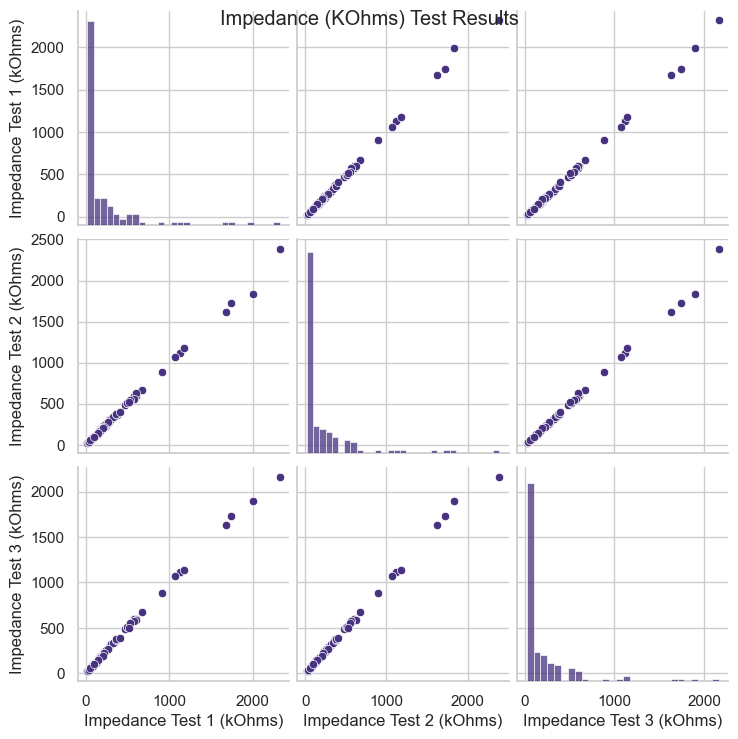

In [52]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with the impedance test results

# Plotting the data with custom settings
sns.set(style="whitegrid")
sns.set_palette("viridis")  # Choose a different color palette, e.g., "viridis"

# Convert impedance columns to KOhms for better visualization
df_new[['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']] #*= 1000

# Plotting the data
g = sns.pairplot(df_new[['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']])
g.fig.suptitle('Impedance (KOhms) Test Results')  # Title above the plot

# Customizing y-axis label with units
#g.set(ylabel="Impedance (KOhms)")

# Performing pair t-test for each pair of columns
columns_to_compare = ['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1, col2 = columns_to_compare[i], columns_to_compare[j]
        
        t_stat, p_value = ttest_rel(df_new[col1], df_new[col2])
        
        # Format p-value to four decimal places
        formatted_p_value = format(p_value, '.4f')
        
        print(f"T-test between {col1} and {col2}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {formatted_p_value}")
        print("")

# Save the pair plot as an image file (e.g., PNG)
plt.savefig("ximpedance_pair_plot_pre_mri.png")

# Show the plot
plt.show()

In [53]:
df_pre_mri=pd.DataFrame()
df_pre_mri=df_new

In [54]:
df_pre_mri['Impedance Test 1 (kOhms)'].mean()

232.28346456692913

In [55]:
df_pre_mri['Impedance Test 2 (kOhms)'].mean()

231.79527559055117

In [56]:
df_pre_mri['Impedance Test 3 (kOhms)'].mean()

230.21259842519686

In [57]:
path_post=r"C:\Users\furqa\Downloads\20240116-204034.log"

In [58]:
path_post=r"C:\Users\furqa\Downloads\20240116-202801.log"

In [12]:
import re
import pandas as pd

# Define a regular expression pattern to extract the required information
pattern = r'\[(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{3})\] \[info\] Impedance of (E\d+) = (\d+kOhms)'

# Create an empty DataFrame
df_post = pd.DataFrame(columns=['Timestamp', 'Channel', 'Impedance'])

# Open the text file
with open(path_post, 'r') as file:
    for line in file:
        # Use regex to search for the pattern in each line
        match = re.search(pattern, line)
        if match:
            # Extract the information from the matched line
            timestamp = match.group(1)
            channel = match.group(2)
            impedance = match.group(3)

            # Append the extracted information as a new row to the DataFrame
            df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)

# Display the DataFrame
print(df_post)


C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176

C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176

                   Timestamp Channel Impedance
0    2024-01-16 20:40:55.712      E1   85kOhms
1    2024-01-16 20:40:56.014      E2   37kOhms
2    2024-01-16 20:40:56.095      E3   38kOhms
3    2024-01-16 20:40:56.176      E4   27kOhms
4    2024-01-16 20:40:56.256      E5   36kOhms
..                       ...     ...       ...
757  2024-01-16 20:43:26.966    E123   54kOhms
758  2024-01-16 20:43:27.046    E124   42kOhms
759  2024-01-16 20:43:27.127    E125   90kOhms
760  2024-01-16 20:43:27.207    E126   61kOhms
761  2024-01-16 20:43:27.287    E127  120kOhms

[762 rows x 3 columns]


C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176\3970142133.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_post = df_post.append({'Timestamp': timestamp, 'Channel': channel, 'Impedance': impedance}, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_35176

In [13]:
df_post

,Timestamp,Channel,Impedance
0,2024-01-16 20:40:55.712,E1,85kOhms
1,2024-01-16 20:40:56.014,E2,37kOhms
2,2024-01-16 20:40:56.095,E3,38kOhms
3,2024-01-16 20:40:56.176,E4,27kOhms
4,2024-01-16 20:40:56.256,E5,36kOhms
...,...,...,...
757,2024-01-16 20:43:26.966,E123,54kOhms
758,2024-01-16 20:43:27.046,E124,42kOhms
759,2024-01-16 20:43:27.127,E125,90kOhms
760,2024-01-16 20:43:27.207,E126,61kOhms


In [14]:
df_pre

,Timestamp,Channel,Impedance
0,2023-12-20 20:31:03.806,E1,95kOhms
1,2023-12-20 20:31:03.906,E2,44kOhms
2,2023-12-20 20:31:03.986,E3,42kOhms
3,2023-12-20 20:31:04.067,E4,35kOhms
4,2023-12-20 20:31:04.167,E5,39kOhms
...,...,...,...
757,2023-12-20 20:32:49.020,E123,52kOhms
758,2023-12-20 20:32:49.100,E124,39kOhms
759,2023-12-20 20:32:49.180,E125,71kOhms
760,2023-12-20 20:32:49.321,E126,66kOhms


In [16]:
df_new=pd.DataFrame()
df_new=df_post[['Channel','Impedance']][:127]
df_new = df_new.rename(columns={'Impedance': 'Impedance Test 1'})
df_new['Impedance Test 2']=df_post['Impedance'][127:254].values
df_new['Impedance Test 3']=df_post['Impedance'][254:254+127].values

In [17]:
df_new

,Channel,Impedance Test 1,Impedance Test 2,Impedance Test 3
0,E1,85kOhms,82kOhms,81kOhms
1,E2,37kOhms,35kOhms,34kOhms
2,E3,38kOhms,37kOhms,39kOhms
3,E4,27kOhms,30kOhms,30kOhms
4,E5,36kOhms,33kOhms,32kOhms
...,...,...,...,...
122,E123,57kOhms,56kOhms,55kOhms
123,E124,42kOhms,43kOhms,43kOhms
124,E125,96kOhms,95kOhms,93kOhms
125,E126,62kOhms,62kOhms,60kOhms


In [18]:
import pandas as pd

# Assuming df_new is your DataFrame
# Replace 'Impedance Test 1', 'Impedance Test 2', 'Impedance Test 3' columns
columns_to_clean = ['Impedance Test 1', 'Impedance Test 2', 'Impedance Test 3']

for column in columns_to_clean:
    df_new[column] = df_new[column].str.replace('kOhms', '').astype(int)

# Now df_new contains the numeric values without the 'kOhms' suffix
print(df_new)


    Channel  Impedance Test 1  Impedance Test 2  Impedance Test 3
0        E1                85                82                81
1        E2                37                35                34
2        E3                38                37                39
3        E4                27                30                30
4        E5                36                33                32
..      ...               ...               ...               ...
122    E123                57                56                55
123    E124                42                43                43
124    E125                96                95                93
125    E126                62                62                60
126    E127               125               123               122

[127 rows x 4 columns]


In [19]:
import pandas as pd

# Assuming df_new is your DataFrame
columns_to_clean = ['Impedance Test 1', 'Impedance Test 2', 'Impedance Test 3']

for column in columns_to_clean:
    if column in df_new.columns:
        df_new[column] = df_new[column].astype(str).str.replace('kOhms', '').astype(int)
    else:
        print(f"Column '{column}' not found in the DataFrame.")

# Now df_new contains the numeric values without the 'kOhms' suffix
print(df_new)


    Channel  Impedance Test 1  Impedance Test 2  Impedance Test 3
0        E1                85                82                81
1        E2                37                35                34
2        E3                38                37                39
3        E4                27                30                30
4        E5                36                33                32
..      ...               ...               ...               ...
122    E123                57                56                55
123    E124                42                43                43
124    E125                96                95                93
125    E126                62                62                60
126    E127               125               123               122

[127 rows x 4 columns]


In [20]:
import pandas as pd

# Assuming df_new is your DataFrame
# Get the current column names
current_column_names = df_new.columns

# Create new column names with 'kOhms' included where required
new_column_names = [f'{col} (kOhms)' if 'Impedance Test' in col else col for col in current_column_names]

# Rename the columns
df_new.columns = new_column_names

# Now df_new has updated column names with 'kOhms' included where required
print(df_new)


    Channel  Impedance Test 1 (kOhms)  Impedance Test 2 (kOhms)  \
0        E1                        85                        82   
1        E2                        37                        35   
2        E3                        38                        37   
3        E4                        27                        30   
4        E5                        36                        33   
..      ...                       ...                       ...   
122    E123                        57                        56   
123    E124                        42                        43   
124    E125                        96                        95   
125    E126                        62                        62   
126    E127                       125                       123   

     Impedance Test 3 (kOhms)  
0                          81  
1                          34  
2                          39  
3                          30  
4                          32  
.. 

In [21]:
df_new

,Channel,Impedance Test 1 (kOhms),Impedance Test 2 (kOhms),Impedance Test 3 (kOhms)
0,E1,85,82,81
1,E2,37,35,34
2,E3,38,37,39
3,E4,27,30,30
4,E5,36,33,32
...,...,...,...,...
122,E123,57,56,55
123,E124,42,43,43
124,E125,96,95,93
125,E126,62,62,60


In [22]:
df_new.to_csv('impedence_test_resuls_pre_mri.csv')

In [23]:
df_post_mri=pd.DataFrame()
df_post_mri=df_new

T-test between Impedance Test 1 (kOhms) and Impedance Test 2 (kOhms):
T-statistic: -0.35844823695077055
P-value: 0.7206

T-test between Impedance Test 1 (kOhms) and Impedance Test 3 (kOhms):
T-statistic: 1.2935707659003777
P-value: 0.1982

T-test between Impedance Test 2 (kOhms) and Impedance Test 3 (kOhms):
T-statistic: 1.4027841920346988
P-value: 0.1631



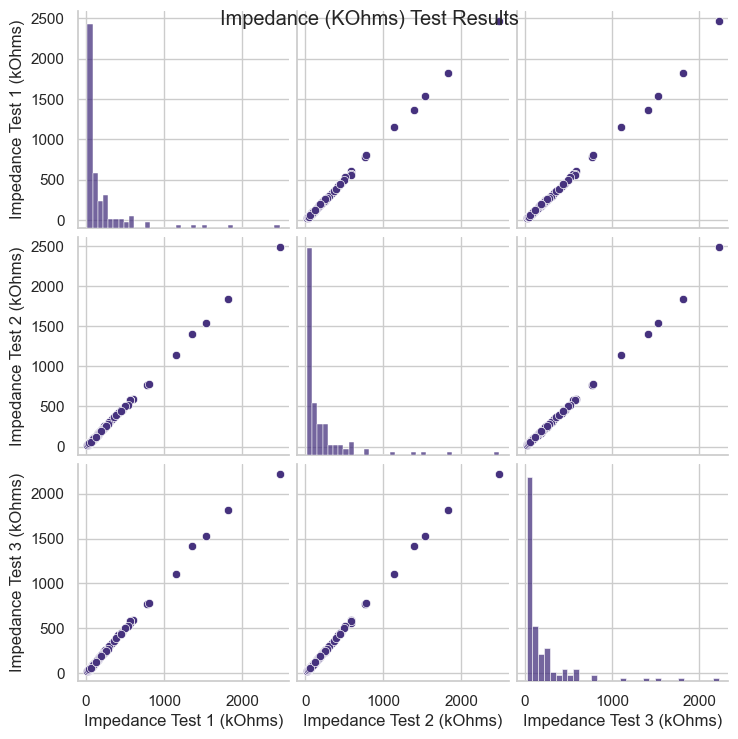

In [24]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with the impedance test results

# Plotting the data with custom settings
sns.set(style="whitegrid")
sns.set_palette("viridis")  # Choose a different color palette, e.g., "viridis"

# Convert impedance columns to KOhms for better visualization
df_new[['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']] #*= 1000

# Plotting the data
g = sns.pairplot(df_new[['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']])
g.fig.suptitle('Impedance (KOhms) Test Results')  # Title above the plot

# Customizing y-axis label with units
#g.set(ylabel="Impedance (KOhms)")

# Performing pair t-test for each pair of columns
columns_to_compare = ['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']

for i in range(len(columns_to_compare)):
    for j in range(i + 1, len(columns_to_compare)):
        col1, col2 = columns_to_compare[i], columns_to_compare[j]
        
        t_stat, p_value = ttest_rel(df_new[col1], df_new[col2])
        
        # Format p-value to four decimal places
        formatted_p_value = format(p_value, '.4f')
        
        print(f"T-test between {col1} and {col2}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {formatted_p_value}")
        print("")

# Save the pair plot as an image file (e.g., PNG)
plt.savefig("ximpedance_pair_plot_post_mri_2.png")

# Show the plot
plt.show()

In [26]:
df_pre_mri

,Channel,Impedance Test 1 (kOhms),Impedance Test 2 (kOhms),Impedance Test 3 (kOhms)
0,E1,95,95,95
1,E2,44,42,43
2,E3,42,41,43
3,E4,35,37,35
4,E5,39,39,39
...,...,...,...,...
122,E123,51,52,52
123,E124,39,37,37
124,E125,75,74,72
125,E126,69,68,64


In [25]:
df_post_mri

,Channel,Impedance Test 1 (kOhms),Impedance Test 2 (kOhms),Impedance Test 3 (kOhms)
0,E1,85,82,81
1,E2,37,35,34
2,E3,38,37,39
3,E4,27,30,30
4,E5,36,33,32
...,...,...,...,...
122,E123,57,56,55
123,E124,42,43,43
124,E125,96,95,93
125,E126,62,62,60


In [29]:
from scipy.stats import ttest_ind

# Assuming your dataframes are named df_pre_mri and df_post_mri

# Specify the columns for which you want to perform t-tests
test_columns = ['Impedance Test 1 (kOhms)', 'Impedance Test 2 (kOhms)', 'Impedance Test 3 (kOhms)']

# Loop through each test column and perform t-test
for column in test_columns:
    pre_mri_data = df_pre_mri[column]
    post_mri_data = df_post_mri[column]

    # Perform t-test
    t_statistic, p_value = ttest_ind(pre_mri_data, post_mri_data)

    # Print the results rounded to 4 decimals
    print(f'Test (Pre MRI vs Post MRI): {column}')
    print(f'T-Statistic: {round(t_statistic, 4)}')
    print(f'P-Value: {round(p_value, 4)}')
    print('---------------------')


Test (Pre MRI vs Post MRI): Impedance Test 1 (kOhms)
T-Statistic: 2.1127
P-Value: 0.0356
---------------------
Test (Pre MRI vs Post MRI): Impedance Test 2 (kOhms)
T-Statistic: 2.0145
P-Value: 0.045
---------------------
Test (Pre MRI vs Post MRI): Impedance Test 3 (kOhms)
T-Statistic: 2.0629
P-Value: 0.0401
---------------------


In [8]:
import pandas as pd

# Assuming your DataFrame is named df

# Create a new DataFrame to store the reshaped data
reshaped_df = pd.DataFrame(columns=['Timestamp', 'Channel', 'Impedance Test 1', 'Impedance Test 2', 'Impedance Test 3'])

# Iterate through each channel
for channel in df['Channel'].unique():
    # Extract data for the current channel
    channel_data = df[df['Channel'] == channel]

    # Extract impedance values for each test
    impedance_test_1 = channel_data.iloc[:128]['Impedance'].values
    impedance_test_2 = channel_data.iloc[128:256]['Impedance'].values
    impedance_test_3 = channel_data.iloc[256:]['Impedance'].values

    # Create a new row for the reshaped DataFrame
    new_row = {
        'Timestamp': channel_data['Timestamp'].values[0],
        'Channel': channel,
        'Impedance Test 1': impedance_test_1,
        'Impedance Test 2': impedance_test_2,
        'Impedance Test 3': impedance_test_3,
    }

    # Append the new row to the reshaped DataFrame
    reshaped_df = reshaped_df.append(new_row, ignore_index=True)

# Print the reshaped DataFrame
print(reshaped_df)


                   Timestamp Channel  \
0    2023-12-20 20:31:03.806      E1   
1    2023-12-20 20:31:03.906      E2   
2    2023-12-20 20:31:03.986      E3   
3    2023-12-20 20:31:04.067      E4   
4    2023-12-20 20:31:04.167      E5   
..                       ...     ...   
122  2023-12-20 20:31:15.619    E123   
123  2023-12-20 20:31:15.700    E124   
124  2023-12-20 20:31:15.780    E125   
125  2023-12-20 20:31:15.980    E126   
126  2023-12-20 20:31:16.081    E127   

                                      Impedance Test 1 Impedance Test 2  \
0    [95kOhms, 95kOhms, 95kOhms, 95kOhms, 93kOhms, ...               []   
1    [44kOhms, 42kOhms, 43kOhms, 42kOhms, 43kOhms, ...               []   
2    [42kOhms, 41kOhms, 43kOhms, 40kOhms, 42kOhms, ...               []   
3    [35kOhms, 37kOhms, 35kOhms, 34kOhms, 35kOhms, ...               []   
4    [39kOhms, 39kOhms, 39kOhms, 38kOhms, 40kOhms, ...               []   
..                                                 ...              .

C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\2986127222.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(new_row, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\2986127222.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(new_row, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\2986127222.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(new_row, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\2986127222.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resha

In [38]:
df_new

,Channel,Impedance 1,Impedance 2,Impedance 3
0,E1,95,95,95
1,E2,44,42,43
2,E3,42,41,43
3,E4,35,37,35
4,E5,39,39,39
...,...,...,...,...
122,E123,51,52,52
123,E124,39,37,37
124,E125,75,74,72
125,E126,69,68,64


In [10]:
import pandas as pd

# Assuming your DataFrame is named df

# Number of rows per test
rows_per_test = 128

# Calculate the number of tests
num_tests = len(df) // rows_per_test

# Create a new DataFrame to store the reshaped data
reshaped_df = pd.DataFrame(columns=['Timestamp', 'Channel'] + [f'Impedance Test {i}' for i in range(1, num_tests + 1)])

# Iterate through each channel
for channel in df['Channel'].unique():
    # Extract data for the current channel
    channel_data = df[df['Channel'] == channel]

    # Initialize a dictionary to store the data for the current channel
    channel_dict = {'Timestamp': channel_data['Timestamp'].values[0], 'Channel': channel}

    # Iterate through each test
    for i in range(num_tests):
        # Extract impedance values for the current test
        start_idx = i * rows_per_test
        end_idx = (i + 1) * rows_per_test
        impedance_values = channel_data.iloc[start_idx:end_idx]['Impedance'].tolist()
        # Create a column for the current test in the dictionary
        channel_dict[f'Impedance Test {i + 1}'] = impedance_values

    # Append the dictionary as a new row to the reshaped DataFrame
    reshaped_df = reshaped_df.append(channel_dict, ignore_index=True)

# Print the reshaped DataFrame
print(reshaped_df)


                   Timestamp Channel  \
0    2023-12-20 20:31:03.806      E1   
1    2023-12-20 20:31:03.906      E2   
2    2023-12-20 20:31:03.986      E3   
3    2023-12-20 20:31:04.067      E4   
4    2023-12-20 20:31:04.167      E5   
..                       ...     ...   
122  2023-12-20 20:31:15.619    E123   
123  2023-12-20 20:31:15.700    E124   
124  2023-12-20 20:31:15.780    E125   
125  2023-12-20 20:31:15.980    E126   
126  2023-12-20 20:31:16.081    E127   

                                      Impedance Test 1 Impedance Test 2  \
0    [95kOhms, 95kOhms, 95kOhms, 95kOhms, 93kOhms, ...               []   
1    [44kOhms, 42kOhms, 43kOhms, 42kOhms, 43kOhms, ...               []   
2    [42kOhms, 41kOhms, 43kOhms, 40kOhms, 42kOhms, ...               []   
3    [35kOhms, 37kOhms, 35kOhms, 34kOhms, 35kOhms, ...               []   
4    [39kOhms, 39kOhms, 39kOhms, 38kOhms, 40kOhms, ...               []   
..                                                 ...              .

C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\1287753699.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(channel_dict, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\1287753699.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(channel_dict, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\1287753699.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_df = reshaped_df.append(channel_dict, ignore_index=True)
C:\Users\furqa\AppData\Local\Temp\ipykernel_54896\1287753699.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [11]:
reshaped_df

,Timestamp,Channel,Impedance Test 1,Impedance Test 2,Impedance Test 3,Impedance Test 4,Impedance Test 5
0,2023-12-20 20:31:03.806,E1,"[95kOhms, 95kOhms, 95kOhms, 95kOhms, 93kOhms, ...",[],[],[],[]
1,2023-12-20 20:31:03.906,E2,"[44kOhms, 42kOhms, 43kOhms, 42kOhms, 43kOhms, ...",[],[],[],[]
2,2023-12-20 20:31:03.986,E3,"[42kOhms, 41kOhms, 43kOhms, 40kOhms, 42kOhms, ...",[],[],[],[]
3,2023-12-20 20:31:04.067,E4,"[35kOhms, 37kOhms, 35kOhms, 34kOhms, 35kOhms, ...",[],[],[],[]
4,2023-12-20 20:31:04.167,E5,"[39kOhms, 39kOhms, 39kOhms, 38kOhms, 40kOhms, ...",[],[],[],[]
...,...,...,...,...,...,...,...
122,2023-12-20 20:31:15.619,E123,"[51kOhms, 52kOhms, 52kOhms, 52kOhms, 52kOhms, ...",[],[],[],[]
123,2023-12-20 20:31:15.700,E124,"[39kOhms, 37kOhms, 37kOhms, 38kOhms, 37kOhms, ...",[],[],[],[]
124,2023-12-20 20:31:15.780,E125,"[75kOhms, 74kOhms, 72kOhms, 71kOhms, 72kOhms, ...",[],[],[],[]
125,2023-12-20 20:31:15.980,E126,"[69kOhms, 68kOhms, 64kOhms, 68kOhms, 68kOhms, ...",[],[],[],[]


In [7]:
df['Impedance test 2']=df[128:]['Impedance']

In [8]:
df

,Timestamp,Channel,Impedance,Impedance test 2
0,2023-10-24 22:35:42.498,E1,248kOhms,NaN
1,2023-10-24 22:35:42.598,E2,1057kOhms,NaN
2,2023-10-24 22:35:42.679,E3,1317kOhms,NaN
3,2023-10-24 22:35:42.759,E4,1702kOhms,NaN
4,2023-10-24 22:35:42.919,E5,1529kOhms,NaN
...,...,...,...,...
379,2023-10-24 22:36:39.895,E124,294kOhms,294kOhms
380,2023-10-24 22:36:40.035,E125,314kOhms,314kOhms
381,2023-10-24 22:36:40.116,E126,269kOhms,269kOhms
382,2023-10-24 22:36:40.216,E127,273kOhms,273kOhms


In [9]:
import re
import pandas as pd

# Define a regular expression pattern to extract the required information
pattern = r'\[(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{3})\] \[debug\] Impedance of (E\d+) = (\d+kOhms)'

# Create an empty DataFrame
df = pd.DataFrame(columns=['Timestamp', 'Channel', 'Impedance', 'Test'])

# Create dictionaries to store data for test 1 and test 2
test1_data = {}
test2_data = {}
current_test = 1

# Open the text file
with open(r"C:\Users\furqa\OneDrive - University of California, Davis\Documents\GitHub\RAship\Ini-map Personal-data\20231024-223508.log", 'r') as file:
    for line in file:
        # Use regex to search for the pattern in each line
        match = re.search(pattern, line)
        if match:
            # Extract the information from the matched line
            timestamp = match.group(1)
            channel = match.group(2)
            impedance = match.group(3)

            if current_test == 1:
                if channel not in test1_data:
                    test1_data[channel] = {'Timestamp': [], 'Impedance': []}
                test1_data[channel]['Timestamp'].append(timestamp)
                test1_data[channel]['Impedance'].append(impedance)
            else:
                if channel not in test2_data:
                    test2_data[channel] = {'Timestamp': [], 'Impedance': []}
                test2_data[channel]['Timestamp'].append(timestamp)
                test2_data[channel]['Impedance'].append(impedance)

        # Check if a new test has started
        if "Starting test" in line:
            current_test += 1

# Create columns for test 1 and test 2 impedances
for channel in test1_data:
    df[channel + '_Test1_Impedance'] = test1_data[channel]['Impedance']
    df[channel + '_Test2_Impedance'] = test2_data[channel]['Impedance']

# Display the DataFrame
print(df)


KeyError: 'E1'